In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification


In [3]:
plt.style.use('seaborn')

# DataSet

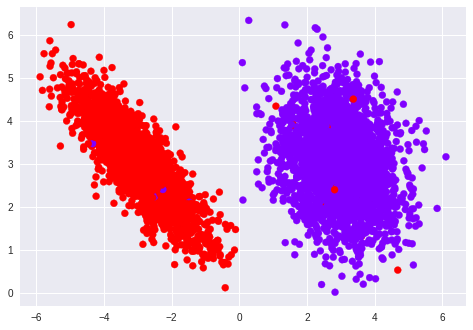

In [48]:
x,y= make_classification(n_samples=5000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,n_classes=2,class_sep=3,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')
plt.show()

In [49]:
x=np.hstack((np.ones((x.shape[0],1)),x))

In [50]:
x

array([[ 1.        , -1.38154766,  1.42213453],
       [ 1.        ,  2.63814928,  2.99202569],
       [ 1.        ,  3.90002662,  2.41916516],
       ...,
       [ 1.        ,  1.35146468,  2.70359611],
       [ 1.        , -2.14544246,  2.06684909],
       [ 1.        ,  4.18908065,  3.43774069]])

# Algorithm

Hypothesis (with sigmoid function).

In [51]:
def hypothesis(X,theta):
  return 1/(1+np.exp(-1*np.dot(X,theta)))

Error Calculation with log loss function.


In [52]:
def error(X,Y,theta):
  y_=hypothesis(X,theta)
  e=np.sum(Y*np.log(y_)+(1-Y)*np.log(1-y_))
  return -1*e/X.shape[0]

calculating Gradient

In [53]:
def gradient(X,Y,theta):
  grad=np.zeros(X.shape[1])
  y_=hypothesis(X,theta)
  grad=np.dot(X.T,y_-Y)
  return grad/X.shape[0]


Gradient Descent 

In [54]:
def gradient_descent(X,Y,lr=0.1,max_step=1000):
  theta=np.zeros(X.shape[1])
  e=[]
  for i in range(max_step):
    grad=gradient(X,Y,theta)
    theta=theta-lr*grad
    e.append(error(X,Y,theta))

  return theta,e



In [55]:
theta,err=gradient_descent(x,y)

theta[0] is the intercept

other are coefficient

In [56]:
theta

array([ 0.27681069, -2.00034182, -0.21770038])

In [57]:
err=np.asarray(err)

# Visualising

Text(0.5, 0, 'No. of iteration')

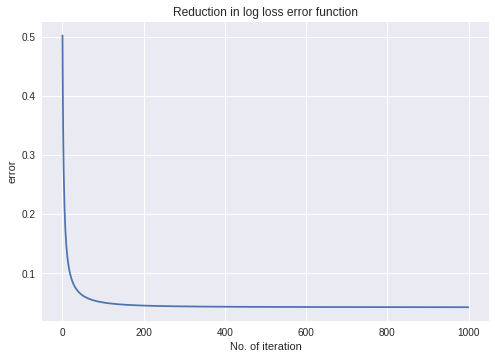

In [62]:
plt.plot(err)
plt.title('Reduction in log loss error function')
plt.ylabel('error')
plt.xlabel('No. of iteration')

Plotting the line that classify our Dataset.


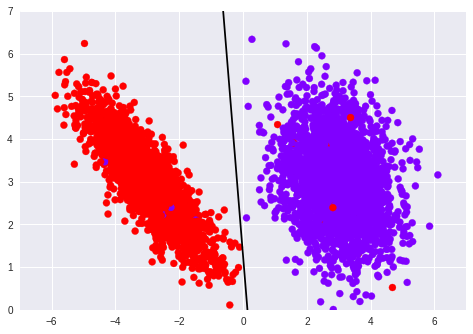

In [61]:
fig,ax=plt.subplots()
ax.scatter(x[:,1],x[:,2],c=y,cmap='rainbow')
z=np.arange(-6,6,5)
ax.plot(z,-1*(1*theta[0]+z*theta[1])/theta[2],color='black')
ax.set_xlim(-7, 7)
ax.set_ylim(0, 7)
plt.show()